In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get data from CSV into DataFrame

ipc = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [3]:
# Checking the list of available columns after merging the required tables of the data

ipc.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [4]:
# Grouping the type/nature of crime in separate list

violent_crimes_against_persons = [
    'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
    'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
    'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
    'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE'
]

crimes_against_property = [
    'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY',
    'ROBBERY', 'BURGLARY', 'THEFT',
    'AUTO THEFT', 'OTHER THEFT', 'ARSON'
]

abduction_and_trafficking_crimes = [
    'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
    'KIDNAPPING AND ABDUCTION OF OTHERS', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'
]

other_crimes = [
    'RIOTS', 'CRIMINAL BREACH OF TRUST',
    'CHEATING', 'COUNTERFIETING',
    'INSULT TO MODESTY OF WOMEN', 'OTHER IPC CRIMES'
]

# Adding crime category to ipc DF

crime_cat = [violent_crimes_against_persons, crimes_against_property, abduction_and_trafficking_crimes,other_crimes ]
ipc['Violent Crimes Against Persons'] = ipc[violent_crimes_against_persons].sum(axis=1)
ipc['Crimes Against Property'] = ipc[crimes_against_property].sum(axis=1)
ipc['Abduction and Trafficking Crimes'] = ipc[abduction_and_trafficking_crimes].sum(axis=1)
ipc['Other Crimes'] = ipc[other_crimes].sum(axis=1)

In [5]:
ipc.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,34,175,0,181,1518,4154,1930,676,92,1751
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,24,154,0,270,754,4125,2415,1016,106,1030
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,83,186,0,404,1262,5818,3018,1739,118,1752
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,38,57,0,233,1181,3140,1402,472,50,1434
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,58,247,0,431,2313,6507,2239,2549,98,2714


In [6]:
# Create a dataset with relevant features only

feat = ['STATE/UT', 'DISTRICT', 'YEAR', 'Violent Crimes Against Persons', 'Crimes Against Property','Abduction and Trafficking Crimes', 'Other Crimes', 'TOTAL IPC CRIMES']

ipc_new = ipc[feat]

ipc_new.head()

,STATE/UT,DISTRICT,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,1930,676,92,1751,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,2415,1016,106,1030,4125
2,ANDHRA PRADESH,CHITTOOR,2001,3018,1739,118,1752,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,1402,472,50,1434,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,2239,2549,98,2714,6507


In [7]:
# Scale the data

ipc_to_scaled = ipc_new.iloc[:,3:] 

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_features = scaler.fit_transform(ipc_to_scaled)

#### 4.1 Creating 3 clusters

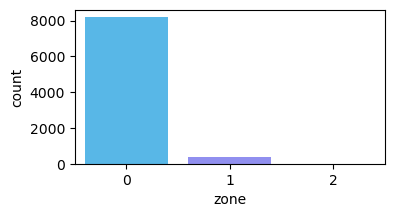

zone
0    8204
1     393
2      12
Name: count, dtype: int64

In [8]:
# Creating Clusters using K Means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

ipc['zone'] = kmeans.fit_predict(scaled_features)
ipc_new['zone'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(4,2))
sns.countplot(x=ipc_new['zone'], palette = 'cool')
plt.show()

ipc_new['zone'].value_counts()

# Observation:

Classification of Areas for the Given Year:

Category 0: Designates Peaceful Areas

Category 1: Indicates Moderate Areas

Category 2: Identifies Sensitive Areas


This classification system provides a nuanced assessment of the security landscape for the specified year.

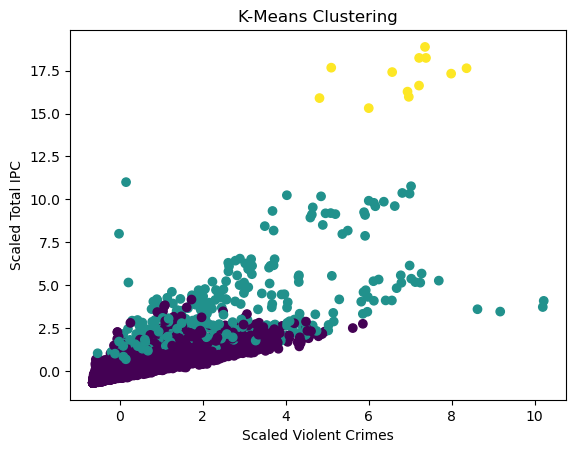

In [9]:
# Plot the clusters

plt.scatter(scaled_features[:, 0], scaled_features[:, -1], c=ipc_new['zone'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Scaled Violent Crimes')
plt.ylabel('Scaled Total IPC')
plt.show()

#### 4.2 Create DataFrame for each cluster that shows data according to the areas.

In [10]:
# Get unique cluster labels

unique_clusters = ipc_new['zone'].unique()

# Extract DataFrame for Cluster 0
peaceful_DF = ipc_new[ipc_new['zone'] == 0]

# Extract DataFrame for Cluster 1
moderate_DF = ipc_new[ipc_new['zone'] == 1]

# Extract DataFrame for Cluster 2
sensitive_DF = ipc_new[ipc_new['zone'] == 2]

In [11]:
peaceful_DF.sample(5)

,STATE/UT,DISTRICT,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
2717,WEST BENGAL,DAKSHIN DINAJPUR,2004,325,215,54,411,860,0
6557,JAMMU & KASHMIR,KARGIL,2010,7,35,2,104,136,0
3623,GUJARAT,VADODARA RURAL,2006,740,457,40,1580,2616,0
8134,KARNATAKA,HAVERI,2012,717,333,36,1390,2333,0
5081,JAMMU & KASHMIR,BUDGAM,2008,160,469,132,903,1404,0


In [12]:
moderate_DF.sample(5)

,STATE/UT,DISTRICT,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
7821,DELHI UT,NORTH-EAST,2011,1072,5546,1060,1357,5734,1
7,ANDHRA PRADESH,HYDERABAD CITY,2001,4739,6819,160,3022,11831,1
2564,RAJASTHAN,JAIPUR,2004,3783,9115,454,11197,20209,1
5199,MADHYA PRADESH,GWALIOR,2008,2132,4933,124,3916,9104,1
7487,MAHARASHTRA,PUNE COMMR.,2011,2297,11238,208,3772,12622,1


In [13]:
sensitive_DF

,STATE/UT,DISTRICT,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
668,DELHI UT,DELHI UT TOTAL,2001,5078,42377,3254,24959,54384,2
1352,DELHI UT,DELHI UT TOTAL,2002,4828,36283,2646,23731,49137,2
2047,DELHI UT,DELHI UT TOTAL,2003,5877,33622,2312,22783,47404,2
2742,DELHI UT,DELHI UT TOTAL,2004,6376,40527,2418,25056,53623,2
3441,DELHI UT,DELHI UT TOTAL,2005,6950,38744,3181,27393,56065,2
4146,DELHI UT,DELHI UT TOTAL,2006,7075,37734,2884,29833,57963,2
4854,DELHI UT,DELHI UT TOTAL,2007,7096,36980,3376,27936,56065,2
5579,DELHI UT,DELHI UT TOTAL,2008,6730,40400,3134,19986,49350,2
6312,DELHI UT,DELHI UT TOTAL,2009,6703,45849,5072,17363,50251,2
7057,DELHI UT,DELHI UT TOTAL,2010,6948,48392,6416,16339,51292,2


#### Analyse your clusters and prepare a report that explains all your observations.

In [14]:
# Check Statistical Summary for peaceful area

peaceful_DF.describe()

,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
count,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.0
mean,2006.594222,737.456485,727.880546,69.379693,1173.015115,2359.288396,0.0
std,3.460196,728.254203,702.000413,75.501961,1178.266763,1998.279196,0.0
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2004.000000,220.000000,230.000000,18.000000,318.750000,792.000000,0.0
50%,2007.000000,537.000000,518.000000,44.000000,834.000000,1879.000000,0.0
75%,2010.000000,1037.000000,992.000000,94.000000,1668.000000,3482.500000,0.0
max,2012.000000,5752.000000,5754.000000,630.000000,11794.000000,14385.000000,0.0


In [15]:
moderate_DF.describe()

,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.0
mean,2007.493639,2596.979644,6616.254453,370.012723,5233.409669,11666.798982,1.0
std,3.437575,1758.428803,5023.733199,265.198688,3662.937221,6321.957555,0.0
min,2001.000000,103.000000,598.000000,8.000000,465.000000,3503.000000,1.0
25%,2005.000000,1324.000000,3978.000000,156.000000,2711.000000,7292.000000,1.0
50%,2008.000000,2122.000000,5304.000000,300.000000,4036.000000,9886.000000,1.0
75%,2011.000000,3469.000000,7070.000000,518.000000,6987.000000,14154.000000,1.0
max,2012.000000,9604.000000,29958.000000,1174.000000,33481.000000,34638.000000,1.0


In [16]:
sensitive_DF.describe()

,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,2006.500000,6604.416667,41274.500000,4180.583333,22626.083333,52764.500000,2.0
std,3.605551,938.398874,4917.311488,2031.683604,4590.124606,3259.581805,0.0
min,2001.000000,4828.000000,33622.000000,2312.000000,16339.000000,47404.000000,2.0
25%,2003.750000,6251.250000,37545.500000,2824.500000,18327.500000,50025.750000,2.0
50%,2006.500000,6839.000000,40463.500000,3217.500000,23257.000000,53488.000000,2.0
75%,2009.250000,7080.250000,46013.500000,5408.000000,25640.250000,54804.250000,2.0
max,2012.000000,7960.000000,48392.000000,7940.000000,29833.000000,57963.000000,2.0


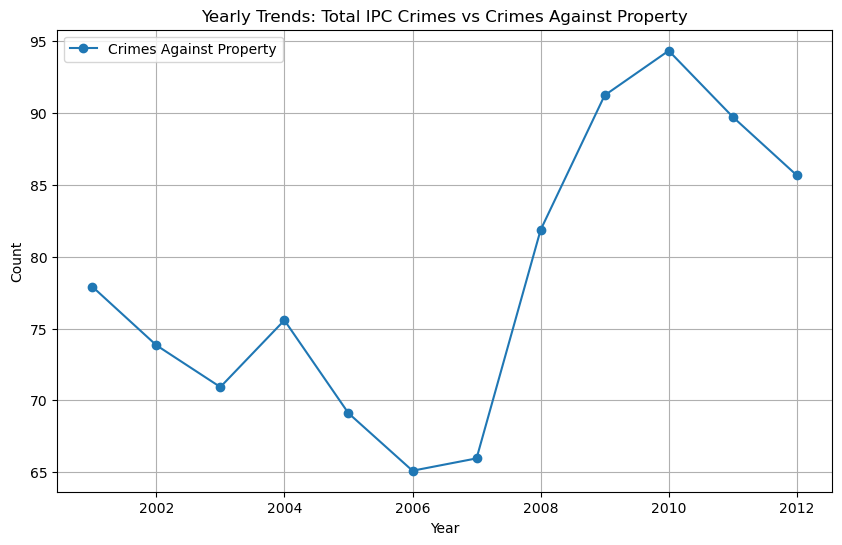

In [17]:
# Assuming your DataFrame is named 'df'
# Filter data for the years 2002 to 2012
selected_columns = ['YEAR', 'TOTAL IPC CRIMES', 'Crimes Against Property']
selected_data = sensitive_DF[selected_columns]

# Group by 'YEAR' and sum the counts
yearly_totals = selected_data.groupby('YEAR').sum()

# Plot the line plot
plt.figure(figsize=(10, 6))

# Plot 'TOTAL IPC CRIMES'
# plt.plot(yearly_totals.index, yearly_totals['TOTAL IPC CRIMES'], marker='o', label='Total IPC Crimes')

# Plot 'Crimes Against Property'
plt.plot(yearly_totals.index, yearly_totals['Crimes Against Property']*100/(yearly_totals['TOTAL IPC CRIMES']), marker='o', label='Crimes Against Property')

plt.title('Yearly Trends: Total IPC Crimes vs Crimes Against Property')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

### 1. What is impacting more crimes in sensitive areas. 

In the identified sensitive areas, specifically Delhi UT, persistent high contribution (65%-90%) of property-related crimes significantly impacts the overall crime rates.

The total IPC crime, as per the statistical summary, fluctuates between 47,404 and 57,963.

#### 2. What needs to be done to reduce crime. 

To mitigate crime, targeted interventions are crucial, particularly in identified sensitive areas such as Delhi UT. Addressing the persistent high contribution of property-related crimes, which ranges from 65% to 90%, should be a priority. Additionally, implementing comprehensive strategies to reduce the overall total IPC crime, which fluctuates between 47,404 and 57,963, is imperative for enhancing community safety.

Addressing and preventing crimes, especially crimes against property, involves a multi-faceted approach that often requires collaboration between communities, law enforcement, and local government. Here are some general preventive measures that can be considered:


1. Encourage community members to be actively involved in neighborhood watch programs.
2. Promote community events and activities to foster a sense of unity and neighborliness.
3. Install security systems, including surveillance cameras, in public spaces and at homes.
4. Improve street lighting in areas that may be prone to criminal activities.
5. Conduct awareness programs on crime prevention and safety for residents.
6. Provide resources and information on securing homes and belongings.
7. Foster collaboration between the community and local law enforcement.
8. Establish regular communication channels for reporting suspicious activities.
9. Design public spaces with visibility and natural surveillance in mind.
10. Explore technology-based solutions such as smart home security systems and mobile apps for reporting crimes.
11. Provide educational and recreational opportunities for young people to steer them away from criminal activities.

#### 3. Most safe and unsafe districts.

**UNSAFE DISTRICT:**

Our analysis reveals that Delhi UT is a district of concern as it consistently falls within the sensitive zone across all years from 2001 to 2012. This consistent classification warrants consideration, suggesting that Delhi UT stands out as an area of heightened concern, meriting focused attention for comprehensive safety measures.


In [18]:
# SAFE DISTRICTS

selected_columns = ['DISTRICT', 'TOTAL IPC CRIMES']
selected_data =peaceful_DF[selected_columns]

# Group by 'YEAR' and sum the counts
yearly_totals = selected_data.groupby(['DISTRICT']).sum()

yearly_totals.sort_values(by='TOTAL IPC CRIMES', ascending=True).head(15)

,TOTAL IPC CRIMES
DISTRICT,
RAILWAYS KATRA,2
RAILWAYS KMR,10
BIEO,16
CID,23
CAR,24
RAILWAYS JAMMU,29
CRIME KASHMIR,32
RAILWAYS KASHMIR,43
CID CRIME,54


#### SAFE DISTRICT(s):

#### Districts with Minimal IPC Crimes (2001-2012):

| District                 | Total IPC Crimes Reported |
|--------------------------|---------------------------|
| RAILWAYS KATRA           | 2                         |
| RAILWAYS KMR             | 10                        |
| BIEO                     | 16                        |
| CID                      | 23                        |
| CAR                      | 24                        |
| RAILWAYS JAMMU           | 29                        |
| CRIME KASHMIR            | 32                        |
| RAILWAYS KASHMIR         | 43                        |
| CID CRIME                | 54                        |
| LONGLENG                 | 84                        |
| ANJAW                    | 85                        |
| SPL CELL                 | 133                       |
| UPPER DIBANG VALLEY      | 148                       |
| G.R.P. JODHPUR           | 149                       |
| HAMREN                   | 150                       |

The districts listed above exhibit notably low instances of reported IPC crimes during the period of 2001-2012, indicative of a comparatively secure environment.